In [1]:
import pandas as pd
import numpy as np
import math
import itertools
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset)
import math
import copy
import re
from collections import OrderedDict 
import Bio
from Bio import SeqIO

from xls_analysis_classes import *

matplotlib.rcParams.update({'font.size': 10})

In [2]:
pwd

'/Users/iecheverria/Dropbox/UCSF/SARS_CoV_2/Nsp2/analys'

In [3]:
XLs_header = 'Nsp2Rap1gds1_4-37_wZn_woutZn_11162021'

D_all = pd.read_csv('../data/Interlinks_XLTools_Nsp2Rap1gds1_4-37_wZn_woutZn_TruncRep1.csv',sep=',')
D_all = D_all.dropna(thresh=4)

In [4]:
D_all.head()

,Search Filename,Search Name,Subunit A,XL A,Subunit B,XL B,Subunit Name A,Subunit Name B,Common/Gene Name A,Common/Gene Name B,...,Crosslinker Number,Crosslinker,Reporter m/z A,Reporter m/z B,Reporter Int. A,Reporter Int. B,Reporter Corr. A,Reporter Corr. B,Average Score,Min Score
2,lu0104171MS3-results_cleaned,lu0104171MS3-results,P52306,MN-Term,QCRG002,K111,P52306|GDS1_HUMAN Rap1 GTPase-GDP dissociation...,QCRG002|NSP2_SARS2 Non-structural protein 2 ta...,P52306,QCRG002,...,1.0,DSSO 14N - 14N,NaN,NaN,NaN,NaN,NaN,NaN,22.7,14.3
3,lu0104171MS3-results_cleaned,lu0104171MS3-results,P52306,K590,QCRG002,K111,P52306|GDS1_HUMAN Rap1 GTPase-GDP dissociation...,QCRG002|NSP2_SARS2 Non-structural protein 2 ta...,P52306,QCRG002,...,1.0,DSSO 14N - 14N,NaN,NaN,NaN,NaN,NaN,NaN,32.0,19.2
4,lu0104171MS3-results_cleaned,lu0104171MS3-results,P52306,K590,QCRG002,K112,P52306|GDS1_HUMAN Rap1 GTPase-GDP dissociation...,QCRG002|NSP2_SARS2 Non-structural protein 2 ta...,P52306,QCRG002,...,1.0,DSSO 14N - 14N,NaN,NaN,NaN,NaN,NaN,NaN,29.8,17.9
5,lu0104171MS3-results_cleaned,lu0104171MS3-results,P52306,K590,QCRG002,K110,P52306|GDS1_HUMAN Rap1 GTPase-GDP dissociation...,QCRG002|NSP2_SARS2 Non-structural protein 2 ta...,P52306,QCRG002,...,1.0,DSSO 14N - 14N,NaN,NaN,NaN,NaN,NaN,NaN,23.1,17.6
6,lu0104171MS3-results_cleaned,lu0104171MS3-results,P52306,K590,QCRG002,K110,P52306|GDS1_HUMAN Rap1 GTPase-GDP dissociation...,QCRG002|NSP2_SARS2 Non-structural protein 2 ta...,P52306,QCRG002,...,1.0,DSSO 14N - 14N,NaN,NaN,NaN,NaN,NaN,NaN,30.2,21.1


In [5]:
# Meta data - MS run to experimental conditions
MD = pd.read_csv('../csv_files/MetaData_NSP2-RAP1GDS1_20211115_For_Ignacia.csv')
MD=MD.rename(columns={"zn?": "zn"})
set(MD['Complex'].values)

{'Nsp2-RAP1GDS1_Trunc', 'Nsp2-RAP1GDS1_w/Zn', 'Nsp2-Rap1gds1'}

In [6]:
D_all['Temp']=np.nan
D_all['zn']=np.nan
D_all['rep']=np.nan
D_all['trunc']=np.nan

In [7]:
missing_searches = []
for i, row in D_all.iterrows():
    x = row['Search Filename']
    name = re.split('MS3|\_|\n',x)[0]
    temp = MD[MD['File']==name]['XL TEMP'].values
    zn = MD[MD['File']==name]['zn'].values
    rep = MD[MD['File']==name]['Comment'].values
    comp = MD[MD['File']==name]['Complex'].values
    if len(temp)==0 or len(zn)==0:
        missing_searches.append(name)
    else:
        D_all.loc[i,'Temp']= temp[0]
        D_all.loc[i,'zn']=zn[0]
        D_all.loc[i,'rep']=rep[0]
        if comp[0]=='Nsp2-RAP1GDS1_Trunc':
            D_all.loc[i,'trunc']=1
        else:
            D_all.loc[i,'trunc']=0
    

In [8]:
D_all.head()

,Search Filename,Search Name,Subunit A,XL A,Subunit B,XL B,Subunit Name A,Subunit Name B,Common/Gene Name A,Common/Gene Name B,...,Reporter Int. A,Reporter Int. B,Reporter Corr. A,Reporter Corr. B,Average Score,Min Score,Temp,zn,rep,trunc
2,lu0104171MS3-results_cleaned,lu0104171MS3-results,P52306,MN-Term,QCRG002,K111,P52306|GDS1_HUMAN Rap1 GTPase-GDP dissociation...,QCRG002|NSP2_SARS2 Non-structural protein 2 ta...,P52306,QCRG002,...,NaN,NaN,NaN,NaN,22.7,14.3,37.0,no_zn,Rep1,0.0
3,lu0104171MS3-results_cleaned,lu0104171MS3-results,P52306,K590,QCRG002,K111,P52306|GDS1_HUMAN Rap1 GTPase-GDP dissociation...,QCRG002|NSP2_SARS2 Non-structural protein 2 ta...,P52306,QCRG002,...,NaN,NaN,NaN,NaN,32.0,19.2,37.0,no_zn,Rep1,0.0
4,lu0104171MS3-results_cleaned,lu0104171MS3-results,P52306,K590,QCRG002,K112,P52306|GDS1_HUMAN Rap1 GTPase-GDP dissociation...,QCRG002|NSP2_SARS2 Non-structural protein 2 ta...,P52306,QCRG002,...,NaN,NaN,NaN,NaN,29.8,17.9,37.0,no_zn,Rep1,0.0
5,lu0104171MS3-results_cleaned,lu0104171MS3-results,P52306,K590,QCRG002,K110,P52306|GDS1_HUMAN Rap1 GTPase-GDP dissociation...,QCRG002|NSP2_SARS2 Non-structural protein 2 ta...,P52306,QCRG002,...,NaN,NaN,NaN,NaN,23.1,17.6,37.0,no_zn,Rep1,0.0
6,lu0104171MS3-results_cleaned,lu0104171MS3-results,P52306,K590,QCRG002,K110,P52306|GDS1_HUMAN Rap1 GTPase-GDP dissociation...,QCRG002|NSP2_SARS2 Non-structural protein 2 ta...,P52306,QCRG002,...,NaN,NaN,NaN,NaN,30.2,21.1,37.0,no_zn,Rep1,0.0


In [9]:
list(set(missing_searches))

['lu0105555', 'lu105706', 'lu1056982']

In [10]:
# Select by condition
# Conditions: noZn-37,noZn-4, Zn-37, Zn-4, Trunc-noZn-37, Trunc-noZn-4
# Generate files for All, noZn-37,noZn-4, noZn, Zn-37, Zn-4, Zn, Trunc-noZn
XLs_header = 'Nsp2Rap1gds1_082022_all'
D = D_all
#D = D_all[((D_all['zn']=='no_zn') & (D_all['Temp']==37.0) & (D_all['trunc']==0))]
#D = D_all[((D_all['zn']=='no_zn') & (D_all['Temp']==4.0) & (D_all['trunc']==0))]
#D = D_all[((D_all['zn']=='no_zn') & (D_all['trunc']==0))]
#D = D_all[((D_all['zn']=='zn') & (D_all['Temp']==37.0) & (D_all['trunc']==0))]
#D = D_all[((D_all['zn']=='zn') & (D_all['Temp']==4.0) & (D_all['trunc']==0))]
#D = D_all[((D_all['zn']=='zn') &(D_all['trunc']==0))]
#D = D_all[((D_all['zn']=='no_zn') & (D_all['trunc']==1))]
           
print(len(D))

12498


In [11]:
####################
# SEQUENCES, PMIDs
####################
prots = ['Nsp2','Rap1Gds1','Dr1']
# Read sequences
seqs = {}
for p in prots:
    for record in SeqIO.parse(f"../data/{p}.fasta", "fasta"):
        seqs[p] = record.seq
        print(p, len(record.seq))

# Re-order dictionary based on protein lenght
seqs_ordered = OrderedDict()
order = [k for k in sorted(seqs, key=lambda k: len(seqs[k]), reverse=True)]

seqs_ordered =  OrderedDict((k, seqs[k]) for k in order)

seqs_ordered_sel = {k:v for k,v in seqs_ordered.items() if k in ['Nsp2', 'Rap1Gds1']}

pmids = {'QCRG002':'Nsp2','P52306':'Rap1Gds1'}

Nsp2 638
Rap1Gds1 607
Dr1 176


In [12]:
def match_seq(fragment, sequence):
    match = [m.start() for m in re.finditer(fragment, str(sequence))]
    return match

In [13]:
D.columns

Index(['Search Filename', 'Search Name', 'Subunit A', 'XL A', 'Subunit B',
       'XL B', 'Subunit Name A', 'Subunit Name B', 'Common/Gene Name A',
       'Common/Gene Name B', 'XL Scan', 'XL RT', 'XL m/z', 'XL Charge',
       'XL PPM', 'Corr. XL PPM', 'Corr. XL Isotope', 'm/z A', 'Charge A',
       'Sequence A', 'Protein Mods A', 'PPM A', 'Score A', 'EV A', 'm/z B',
       'Charge B', 'Sequence B', 'Protein Mods B', 'PPM B', 'Score B', 'EV B',
       'Ambiguous', 'Redundant', 'Subunit Names', 'Linkage Info',
       'Redundant Count', 'Unique Count', 'CLMS-CSV', 'Crosslinker Number',
       'Crosslinker', 'Reporter m/z A', 'Reporter m/z B', 'Reporter Int. A',
       'Reporter Int. B', 'Reporter Corr. A', 'Reporter Corr. B',
       'Average Score', 'Min Score', 'Temp', 'zn', 'rep', 'trunc'],
      dtype='object')

In [14]:
n = get_unique_links(D)
print('Number of unique links:', len(D))

# XLs
# Get files names 
f1 = get_files_names(D)


# Get protein names
prots1 = get_protein_names(D)
unique_links = pd.unique(D['Linkage Info'])

D_unique = process_interlinks_DB(D, f1, prots1, f'Interlinks_{XLs_header}')




Number of unique links: 12498
Number of unique links: 472
Number of unique links, number in DE_unique  472 472


In [15]:
# First sort by N_count
D_unique = D_unique.sort_values(by=['N_count'], ascending=False)
print('Number D_unique', len(D_unique))

# Remove ambiguity, XLs
D_unique_nonambiguos = remove_ambiguity(D_unique, f'Interlinks_{XLs_header}')
other_cols = [c for c in D_unique_nonambiguos.columns if c not in D_unique.columns]
D_unique_nonambiguos = D_unique_nonambiguos[list(D_unique.columns.values)+other_cols]

print('Number D_unique_nonambiguos', len(D_unique_nonambiguos))

# Save reordered columns XLs
D_unique_nonambiguos.to_csv(f'Interlinks_{XLs_header}_nonambiguos_reorder.csv',index=False)



Number D_unique 472
Ambiguity 145 327
Number D_unique_nonambiguos 362


In [16]:
# Rename proteins, remove dimers 
prot_names = {'QCRG002|NSP2_SARS2 Non-structural protein 2 tag cleaved OS=Severe acute respiratory syndrome coronavirus 2 OX=2697049 GN=rep PE=1 SV=1':'Nsp2', 
              'P52306|GDS1_HUMAN Rap1 GTPase-GDP dissociation stimulator 1 OS=Homo sapiens OX=9606 GN=RAP1GDS1 PE=1 SV=3':'Rap1Gds1',
              'Q01658':'Dr1'} 
for index, row in D_unique_nonambiguos.iterrows():
    p1 = row['Protein_name1']
    p2 = row['Protein_name2']
    r1 = row['Residue1']
    r2 = row['Residue2']
    
    num = row['N_count']
    sc = row['Best_Min_score']
    if sc <15:
        if num <15:
            category = 'Low'
            score = 0.5
        else:
            category = 'Medium'
            score = 0.1
    if sc >= 15 and sc<25:
        if num <15:
            category = 'Medium'
            score = 0.1
        else:
            category = 'High'
            score = 0.01
    if sc >=25:
        category = 'High'
        score = 0.01
    
    if p1 in prot_names.keys():
        D_unique_nonambiguos.loc[index, 'Protein_name1'] = prot_names[p1]
        D_unique_nonambiguos.loc[index, 'Category'] = category
        D_unique_nonambiguos.loc[index, 'Confidence score'] = score
    else: 
        D_unique_nonambiguos = D_unique_nonambiguos.drop([index])
        print('Not in dictionary (p1):', p1)
    if p2 in prot_names.keys():
        D_unique_nonambiguos.loc[index, 'Protein_name2'] = prot_names[p2]
        D_unique_nonambiguos.loc[index, 'Category'] = category
        D_unique_nonambiguos.loc[index, 'Confidence score'] = score
    else:
        D_unique_nonambiguos = D_unique_nonambiguos.drop([index])
        print('Not in dictionary (p2):', p2)
    if (p1 == p2) and (r1 == r2):
        D_unique_nonambiguos.loc[index, 'Category'] = 'Dimer'
        D_unique_nonambiguos.loc[index, 'Confidence score'] = 'NA'
    if row['N_count']==1:    
        D_unique_nonambiguos.loc[index,'Category' ] = 'N_count=1'
        D_unique_nonambiguos.loc[index,'Confidence score' ] = 'NA'
    elif (row['N_count']>1) & (row['N_count']<=5):    
        D_unique_nonambiguos.loc[index,'Category' ] = 'N_count<5'
        D_unique_nonambiguos.loc[index,'Confidence score' ] = 'NA'
        
# Save renamed XLs
D_unique_nonambiguos = D_unique_nonambiguos.dropna()

print('Number in database:', len(D_unique_nonambiguos))

Not in dictionary (p2): Q71F23|CENPU_HUMAN Centromere protein U OS=Homo sapiens OX=9606 GN=CENPU PE=1 SV=1
Not in dictionary (p2): Q09666|AHNK_HUMAN Neuroblast differentiation-associated protein AHNAK OS=Homo sapiens OX=9606 GN=AHNAK PE=1 SV=2
Not in dictionary (p2): Q15751|HERC1_HUMAN Probable E3 ubiquitin-protein ligase HERC1 OS=Homo sapiens OX=9606 GN=HERC1 PE=1 SV=2
Not in dictionary (p1): P37088|SCNNA_HUMAN Amiloride-sensitive sodium channel subunit alpha OS=Homo sapiens OX=9606 GN=SCNN1A PE=1 SV=1
Not in dictionary (p2): Q8NER1|TRPV1_HUMAN Transient receptor potential cation channel subfamily V member 1 OS=Homo sapiens OX=9606 GN=TRPV1 PE=1 SV=2
Not in dictionary (p1): O15164|TIF1A_HUMAN Transcription intermediary factor 1-alpha OS=Homo sapiens OX=9606 GN=TRIM24 PE=1 SV=3
Not in dictionary (p2): Q9UHC9|NPCL1_HUMAN NPC1-like intracellular cholesterol transporter 1 OS=Homo sapiens OX=9606 GN=NPC1L1 PE=1 SV=2
Not in dictionary (p1): P16050|LOX15_HUMAN Arachidonate 15-lipoxygenase OS

In [17]:
# Move dimers and N_count=1 to the end of the table

a = D_unique_nonambiguos[(D_unique_nonambiguos['Category']!='Dimer') & 
                         (D_unique_nonambiguos['Category']!='N_count=1') & 
                         (D_unique_nonambiguos['Category']!='N_count=5')]
b = D_unique_nonambiguos[(D_unique_nonambiguos['Category']=='Dimer')]
c = D_unique_nonambiguos[(D_unique_nonambiguos['Category']=='N_count<5')]
d = D_unique_nonambiguos[(D_unique_nonambiguos['Category']=='N_count=1')]
D_unique_nonambiguos = pd.concat([a, c, b, d])
print(len(D_unique_nonambiguos))

D_unique_nonambiguos.to_csv(f'Interlinks_{XLs_header}_renamed_nonambiguos_all.csv',index=False)

446


In [18]:
len(D_unique_nonambiguos[D_unique_nonambiguos['Confidence score']== 'NA'])

273

In [19]:
# Remove dimers, N_count_1
D_unique_clean = D_unique_nonambiguos[D_unique_nonambiguos['Confidence score']!= 'NA']
print(len(D_unique_clean))

D_unique_clean.to_csv(f'Interlinks_{XLs_header}_renamed_nonambiguos_cleaned.csv',index=False)

173


In [20]:
D_unique_removed = D_unique_nonambiguos[D_unique_nonambiguos['Confidence score']== 'NA']
D_unique_removed.to_csv(f'Interlinks_{XLs_header}_renamed_nonambiguos_removed.csv',index=False)

In [21]:
print(len(D_unique_clean), len(D_unique_removed))

173 273


In [22]:
D_unique_nonambiguos

,id,Subunit1,Protein_name1,Subunit2,Protein_name2,Residue1,Residue2,N_count,Redundant_count,Unique_count,...,lu106154_MS3-results_cleaned,lu105995_MS3-results_cleaned,lu0105459_MS3-results_cleaned,lu0104184MS3-results_cleaned,lu106184_MS3-results_cleaned,lu0105197_MS3-results_cleaned,lu0104212_MS3-results_cleaned,lu0105544_MS3-results_cleaned,Category,Confidence score
0,298,P52306,Rap1Gds1,P52306,Rap1Gds1,K412,K445,1887,1887.0,8,...,4.0,3.0,2.0,3.0,4.0,2.0,4.0,1.0,High,0.01
1,460,P52306,Rap1Gds1,QCRG002,Nsp2,K590,K112,396,396,4,...,0.0,0.0,0.0,1.0,0.0,6.0,3.0,0.0,High,0.01
2,48,P52306,Rap1Gds1,QCRG002,Nsp2,K590,K111,387,387,5,...,0.0,1.0,0.0,5.0,0.0,5.0,3.0,0.0,High,0.01
3,456,P52306,Rap1Gds1,QCRG002,Nsp2,K590,K110,132,132,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High,0.01
4,260,QCRG002,Nsp2,QCRG002,Nsp2,K67,K112,319,319,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,187,P52306,Rap1Gds1,P52306,Rap1Gds1,K282,K445,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N_count=1,NA
357,271,P52306,Rap1Gds1,P52306,Rap1Gds1,K67,K77,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N_count=1,NA
358,369,P52306,Rap1Gds1,P52306,Rap1Gds1,K314,K457,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N_count=1,NA
359,88,QCRG002,Nsp2,QCRG002,Nsp2,K67,K67,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N_count=1,NA


In [23]:
D_unique_nonambiguos[D_unique_nonambiguos['Category']=='Dimer']

,id,Subunit1,Protein_name1,Subunit2,Protein_name2,Residue1,Residue2,N_count,Redundant_count,Unique_count,...,lu106154_MS3-results_cleaned,lu105995_MS3-results_cleaned,lu0105459_MS3-results_cleaned,lu0104184MS3-results_cleaned,lu106184_MS3-results_cleaned,lu0105197_MS3-results_cleaned,lu0104212_MS3-results_cleaned,lu0105544_MS3-results_cleaned,Category,Confidence score
12,338,P52306,Rap1Gds1,P52306,Rap1Gds1,K590,K590,200,200,2,...,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,Dimer,NA
25,322,P52306,Rap1Gds1,P52306,Rap1Gds1,MN-Term,MN-Term,111,111,3,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,Dimer,NA
94,416,P52306,Rap1Gds1,P52306,Rap1Gds1,K234,K234,25,25,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,Dimer,NA
101,236,QCRG002,Nsp2,QCRG002,Nsp2,K111,K111,22,22,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dimer,NA
115,333,P52306,Rap1Gds1,P52306,Rap1Gds1,K9,K9,17,17,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dimer,NA
117,363,P52306,Rap1Gds1,P52306,Rap1Gds1,K314,K314,17,17,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dimer,NA


In [24]:
# XLs for modeling
D_IM = XLs_for_modeling(D_unique_clean, f'Interlinks_{XLs_header}')
print(D_IM.tail())
print(len(D_IM))

     Protein1  Protein2 AbsPos1 AbsPos2   Id Num  Score
168  Rap1Gds1      Nsp2     457     111  421   7   0.01
169  Rap1Gds1  Rap1Gds1     314     445  412   6   0.10
170  Rap1Gds1  Rap1Gds1     533     590  343   6   0.01
171  Rap1Gds1      Nsp2     234     333  467   6   0.10
172  Rap1Gds1  Rap1Gds1       9       1  107  19   0.01
173


In [25]:
D_IM[D_IM['AbsPos1']==D_IM['AbsPos2']]

,Protein1,Protein2,AbsPos1,AbsPos2,Id,Num,Score


In [26]:
D_IM.head(35)

,Protein1,Protein2,AbsPos1,AbsPos2,Id,Num,Score
0,Rap1Gds1,Rap1Gds1,412,445,298,1887,0.01
1,Rap1Gds1,Nsp2,590,112,460,396,0.01
2,Rap1Gds1,Nsp2,590,111,48,387,0.01
3,Rap1Gds1,Nsp2,590,110,456,132,0.01
4,Nsp2,Nsp2,67,112,260,319,0.01
5,Nsp2,Nsp2,67,111,136,91,0.01
6,Nsp2,Nsp2,67,110,448,45,0.01
7,Rap1Gds1,Rap1Gds1,409,445,324,420,0.01
8,Rap1Gds1,Rap1Gds1,442,484,281,410,0.01
9,Rap1Gds1,Rap1Gds1,314,361,104,321,0.01


In [45]:
print(len(D_IM))
print(len(D_IM[D_IM['Protein1']==D_IM['Protein2']]))
print(len(D_IM[D_IM['Protein1']!=D_IM['Protein2']]))

173
97
76


In [28]:
linkages = list(set(D_all['Linkage Info']))

In [29]:
l_linkages = []
n1 = 0
n1_amb = 0
for l in linkages:
    dl = D_all[D_all['Linkage Info']==l]
    l_linkages.append(len(dl))
    if len(dl)==1:
        n1+=1
        if ('|' in l) or (';' in l):
            print(l)
            n1_amb +=1

P52306:K9-QCRG002:K110|K111
P52306:K12-QCRG002:K110;K111;K112
P52306:K233;K234-P52306:K234
P52306:K478;K480;K484-Q8NER1:K108
P52306:K314-QCRG002:K67;K78;K81
QCRG002:K30;K45-QCRG002:K67;K78;K81
QCRG002:K22-QCRG002:K110;K111;K112
P52306:K101-Q09666:K876;K879
P52306:MN-Term-P52306:K9|K10
P52306:MN-Term;K10-P52306:MN-Term;K10
QCRG002:K110;K111;K112-QCRG002:K239
P52306:K478-QCRG002:K539;K542
P52306:K234;K240-QCRG002:K539;K542
P52306:MN-Term;K9-P52306:MN-Term;K9
P52306:K442|K445-QCRG002:K111
P52306:MN-Term-QCRG002:K67;K78;K81
P52306:K77-QCRG002:K110;K111;K112
QCRG002:K278-QCRG002:K335;K337;K338
P52306:K445-QCRG002:K111;K112
P52306:K9-Q9UHC9:K1229;K1258
P52306:K409-P52306:K442;K445
P52306:K445-QCRG002:K67;K78;K81
QCRG002:K317-QCRG002:K333;K335
P52306:K590-QCRG002:K110|K111|K112
P52306:K233;K234-QCRG002:K539;K542
P52306:K409|K412-P52306:K442
P52306:K590-QCRG002:K67;K78;K81
P52306:K234-QCRG002:K539;K542
P52306:K9;K10-P52306:MN-Term;K10
QCRG002:K521-QCRG002:K539;K542
QCRG002:K333;K335;K337-QCRG0

In [30]:
print(n1, n1_amb,len(l_linkages))

135 52 472


(0.0, 50.0)

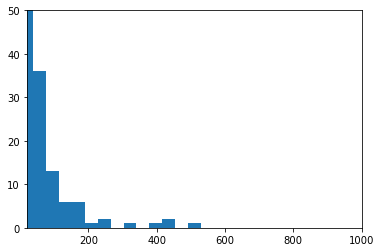

In [31]:
plt.hist(l_linkages,bins=50)
plt.xlim([20,1000])
plt.ylim([0,50])

In [39]:
# Validate Rap1Gds1
sel_K590 = D_all[(D_all['XL A']==D_all['XL B']) & (D_all['XL A']=='K590')]
sel_K590.head()

,Search Filename,Search Name,Subunit A,XL A,Subunit B,XL B,Subunit Name A,Subunit Name B,Common/Gene Name A,Common/Gene Name B,...,Reporter Int. B,Reporter Corr. A,Reporter Corr. B,Average Score,Min Score,Temp,zn,rep,trunc,UniqueID
3819,lu0104181MS3-results_cleaned,lu0104181MS3-results,P52306,K590,P52306,K590,P52306|GDS1_HUMAN Rap1 GTPase-GDP dissociation...,P52306|GDS1_HUMAN Rap1 GTPase-GDP dissociation...,P52306,P52306,...,NaN,NaN,NaN,53.1,51.6,37.0,no_zn,Rep1,0.0,338.0
3905,lu0104191MS3-results_cleaned,lu0104191MS3-results,P52306,K590,P52306,K590,P52306|GDS1_HUMAN Rap1 GTPase-GDP dissociation...,P52306|GDS1_HUMAN Rap1 GTPase-GDP dissociation...,P52306,P52306,...,NaN,NaN,NaN,56.5,56.2,37.0,no_zn,Rep1,0.0,338.0
3906,lu0104191MS3-results_cleaned,lu0104191MS3-results,P52306,K590,P52306,K590,P52306|GDS1_HUMAN Rap1 GTPase-GDP dissociation...,P52306|GDS1_HUMAN Rap1 GTPase-GDP dissociation...,P52306,P52306,...,NaN,NaN,NaN,44.4,40.2,37.0,no_zn,Rep1,0.0,338.0
3907,lu0104191MS3-results_cleaned,lu0104191MS3-results,P52306,K590,P52306,K590,P52306|GDS1_HUMAN Rap1 GTPase-GDP dissociation...,P52306|GDS1_HUMAN Rap1 GTPase-GDP dissociation...,P52306,P52306,...,NaN,NaN,NaN,43.7,43.5,37.0,no_zn,Rep1,0.0,338.0
3918,lu0104192MS3-results_cleaned,lu0104192MS3-results,P52306,K590,P52306,K590,P52306|GDS1_HUMAN Rap1 GTPase-GDP dissociation...,P52306|GDS1_HUMAN Rap1 GTPase-GDP dissociation...,P52306,P52306,...,NaN,NaN,NaN,53.5,52.0,37.0,no_zn,Rep1,0.0,338.0


In [44]:
set(sel_K590['trunc'])

{0.0, nan, nan, nan, nan, 1.0}